                                  sum_sq    df             F    PR(>F)
Temperature_Group          -6.020532e-13   2.0 -9.182492e-15  1.000000
pH_Group                    4.296258e+01   1.0  1.310527e+00  0.258488
Temperature_Group:pH_Group  3.786796e+02   2.0  5.775606e+00  0.005925
Residual                    1.442437e+03  44.0           NaN       NaN


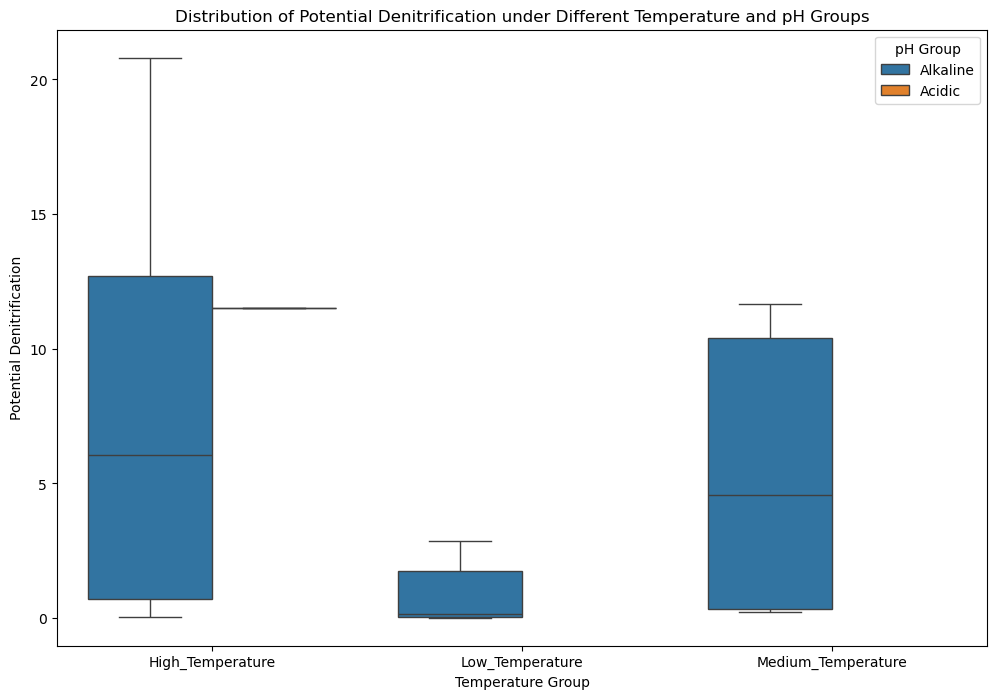

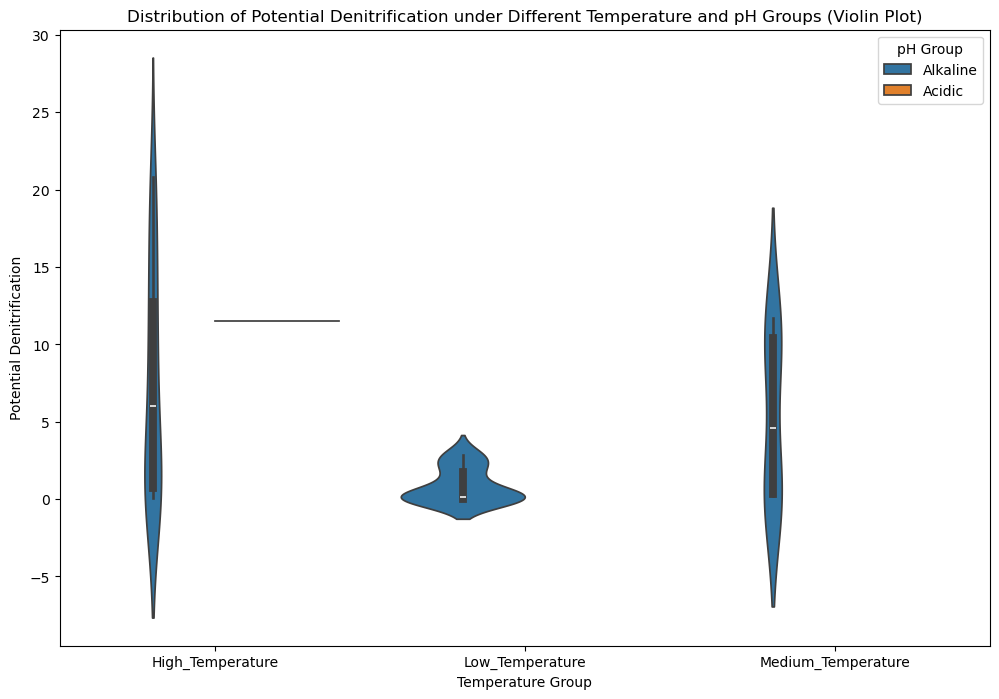

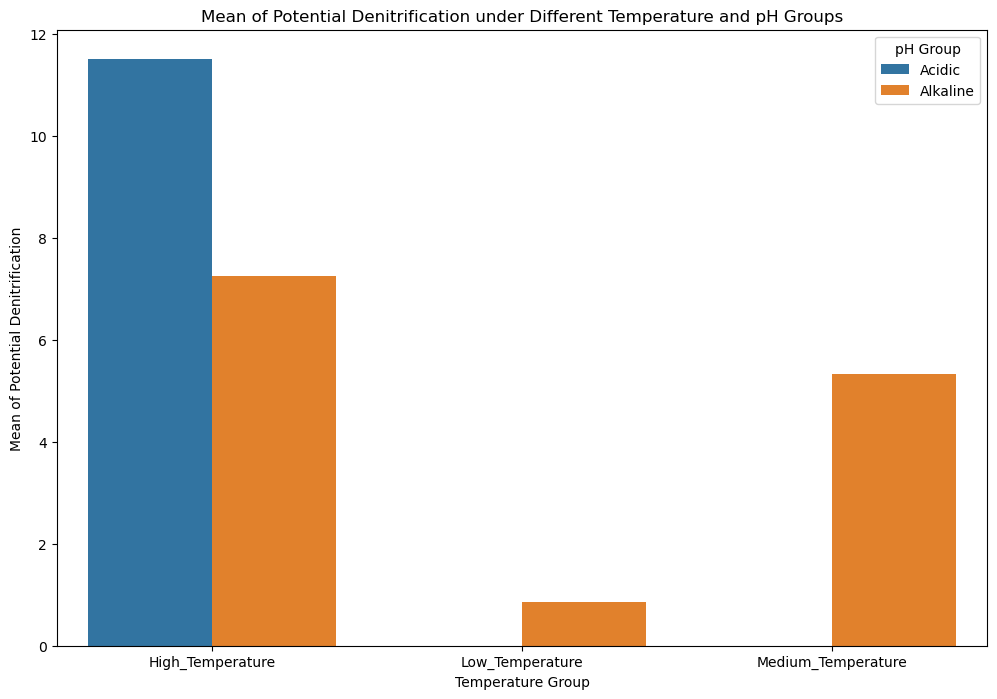

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Read the file
excel_file = pd.ExcelFile('C:/Users/86187/Desktop/反硝化速率 - 副本.xlsx')
df = excel_file.parse('中国知网')

# Fill missing values with the mean
df.fillna(df.mean(), inplace=True)

# Group temperature
def temp_group(temp):
    if temp < 15:
        return 'Low_Temperature'
    elif 15 <= temp < 25:
        return 'Medium_Temperature'
    else:
        return 'High_Temperature'

df['Temperature_Group'] = df['Temoerature'].apply(temp_group)

# Group pH
def ph_group(ph):
    if ph < 7:
        return 'Acidic'
    elif ph == 7:
        return 'Neutral'
    else:
        return 'Alkaline'

df['pH_Group'] = df['pH'].apply(ph_group)

# Replace spaces in column names
df = df.rename(columns={'Potential Denitrification': 'Potential_Denitrification'})

# Build a two - way ANOVA model
model = ols('Potential_Denitrification ~ Temperature_Group + pH_Group + Temperature_Group:pH_Group', data=df).fit()
anova_table = anova_lm(model, typ=2)

# Print the ANOVA results
print(anova_table)

# Draw a box plot to show the distribution of potential denitrification under different temperature and pH groups
plt.figure(figsize=(12, 8))
sns.boxplot(x='Temperature_Group', y='Potential_Denitrification', hue='pH_Group', data=df)
plt.title('Distribution of Potential Denitrification under Different Temperature and pH Groups')
plt.xlabel('Temperature Group')
plt.ylabel('Potential Denitrification')
plt.legend(title='pH Group')
plt.show()

# Draw a violin plot to show the distribution of potential denitrification under different temperature and pH groups
plt.figure(figsize=(12, 8))
sns.violinplot(x='Temperature_Group', y='Potential_Denitrification', hue='pH_Group', data=df)
plt.title('Distribution of Potential Denitrification under Different Temperature and pH Groups (Violin Plot)')
plt.xlabel('Temperature Group')
plt.ylabel('Potential Denitrification')
plt.legend(title='pH Group')
plt.show()

# Calculate the mean of potential denitrification under different temperature and pH groups
grouped_data = df.groupby(['Temperature_Group', 'pH_Group'])['Potential_Denitrification'].mean().reset_index()

# Draw a bar plot to show the mean of potential denitrification under different temperature and pH groups
plt.figure(figsize=(12, 8))
sns.barplot(x='Temperature_Group', y='Potential_Denitrification', hue='pH_Group', data=grouped_data)
plt.title('Mean of Potential Denitrification under Different Temperature and pH Groups')
plt.xlabel('Temperature Group')
plt.ylabel('Mean of Potential Denitrification')
plt.legend(title='pH Group')
plt.show()

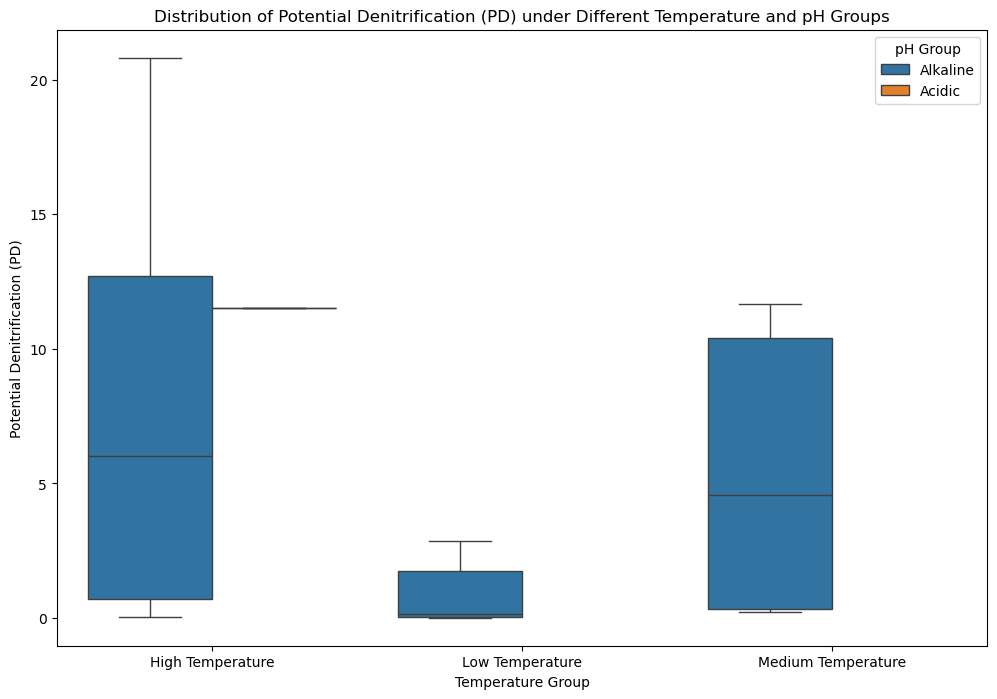

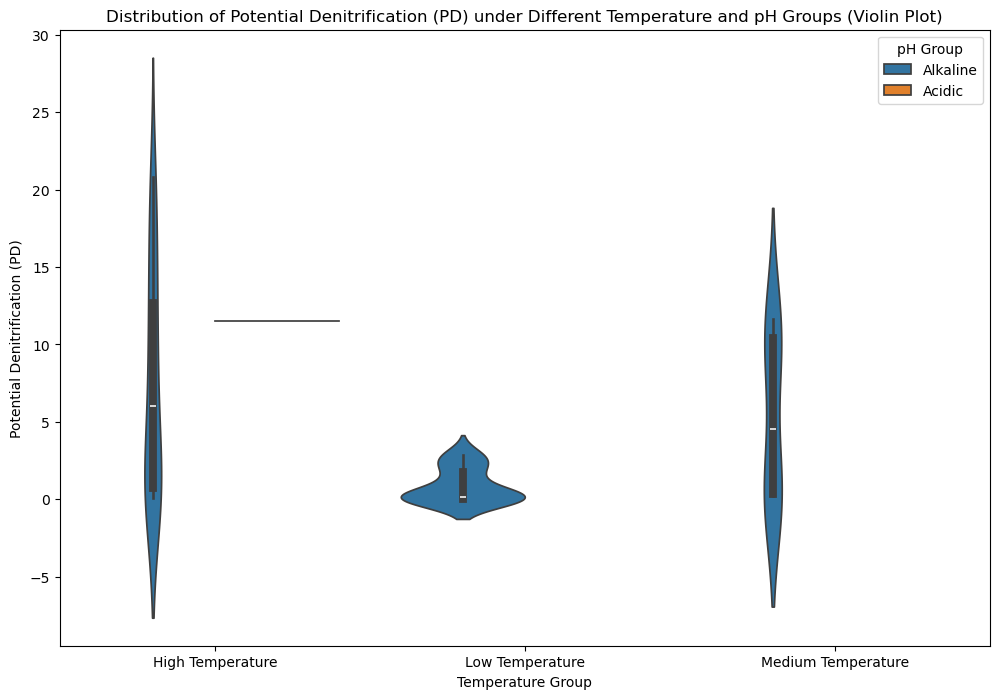

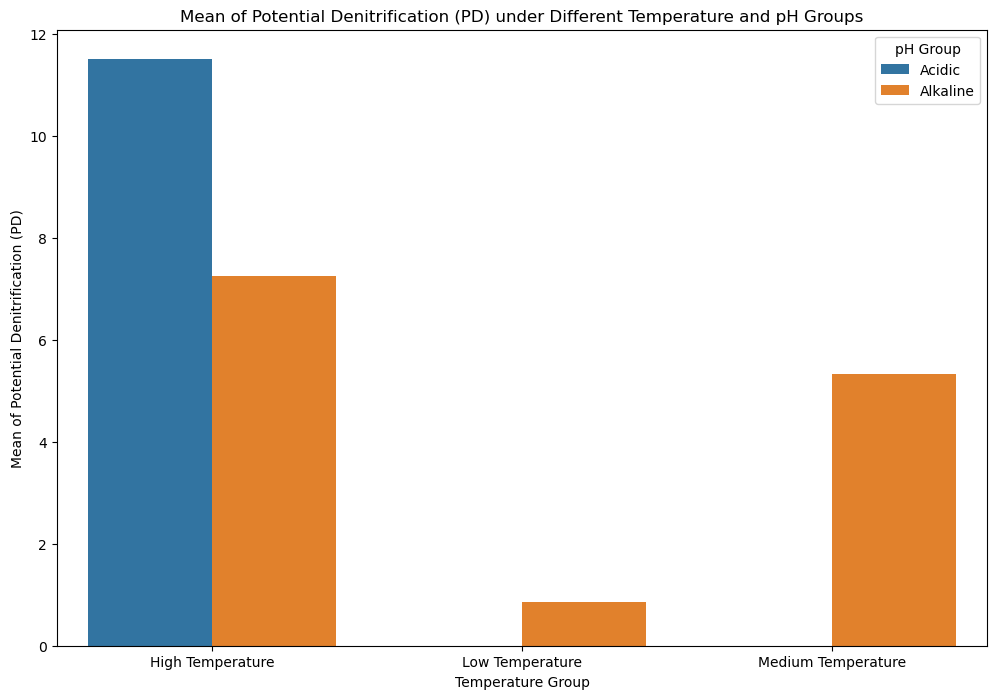

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Read the data from the Excel file
df = pd.read_excel("C:/Users/86187/Desktop/反硝化速率 - 副本.xlsx")

# Fill missing values with the mean of each column
df.fillna(df.mean(), inplace=True)

# Define a function to group temperature into categories
def temp_group(temp):
    if temp < 15:
        return 'Low Temperature'
    elif 15 <= temp < 25:
        return 'Medium Temperature'
    else:
        return 'High Temperature'

# Apply the temperature grouping function to the 'Temoerature' column
df['Temperature Group'] = df['Temoerature'].apply(temp_group)

# Define a function to group pH into categories
def ph_group(ph):
    if ph < 7:
        return 'Acidic'
    elif ph == 7:
        return 'Neutral'
    else:
        return 'Alkaline'

# Apply the pH grouping function to the 'pH' column
df['pH Group'] = df['pH'].apply(ph_group)

# Create a box plot to show the distribution of potential denitrification 
# under different temperature and pH groups
plt.figure(figsize=(12, 8))
sns.boxplot(x='Temperature Group', y='Potential Denitrification', hue='pH Group', data=df)
plt.title('Distribution of Potential Denitrification (PD) under Different Temperature and pH Groups')
plt.xlabel('Temperature Group')
plt.ylabel('Potential Denitrification (PD)')
plt.legend(title='pH Group')
plt.show()

# Create a violin plot to show the distribution of potential denitrification 
# under different temperature and pH groups
plt.figure(figsize=(12, 8))
sns.violinplot(x='Temperature Group', y='Potential Denitrification', hue='pH Group', data=df)
plt.title('Distribution of Potential Denitrification (PD) under Different Temperature and pH Groups (Violin Plot)')
plt.xlabel('Temperature Group')
plt.ylabel('Potential Denitrification (PD)')
plt.legend(title='pH Group')
plt.show()

# Group the data by temperature and pH groups and calculate the mean of potential denitrification
grouped_data = df.groupby(['Temperature Group', 'pH Group'])['Potential Denitrification'].mean().reset_index()

# Create a bar plot to show the mean of potential denitrification 
# under different temperature and pH groups
plt.figure(figsize=(12, 8))
sns.barplot(x='Temperature Group', y='Potential Denitrification', hue='pH Group', data=grouped_data)
plt.title('Mean of Potential Denitrification (PD) under Different Temperature and pH Groups')
plt.xlabel('Temperature Group')
plt.ylabel('Mean of Potential Denitrification (PD)')
plt.legend(title='pH Group')
plt.show()

Data types:
Temoerature                  float64
NO3--N                       float64
NH4+-N                       float64
NO2--N                       float64
SOM                          float64
TN                           float64
pH                           float64
water content                float64
Potential Denitrification    float64
dtype: object

Missing values count:
Temoerature                   0
NO3--N                        0
NH4+-N                        0
NO2--N                       11
SOM                           0
TN                           11
pH                            0
water content                 0
Potential Denitrification     0
dtype: int64
Pearson correlations between independent variables and dependent variable (Pairwise Deletion):
Temoerature      0.468283
NO3--N          -0.295427
NH4+-N          -0.017265
NO2--N          -0.363079
SOM             -0.385532
TN               0.401195
pH              -0.514049
water content   -0.066738
dtype: float64

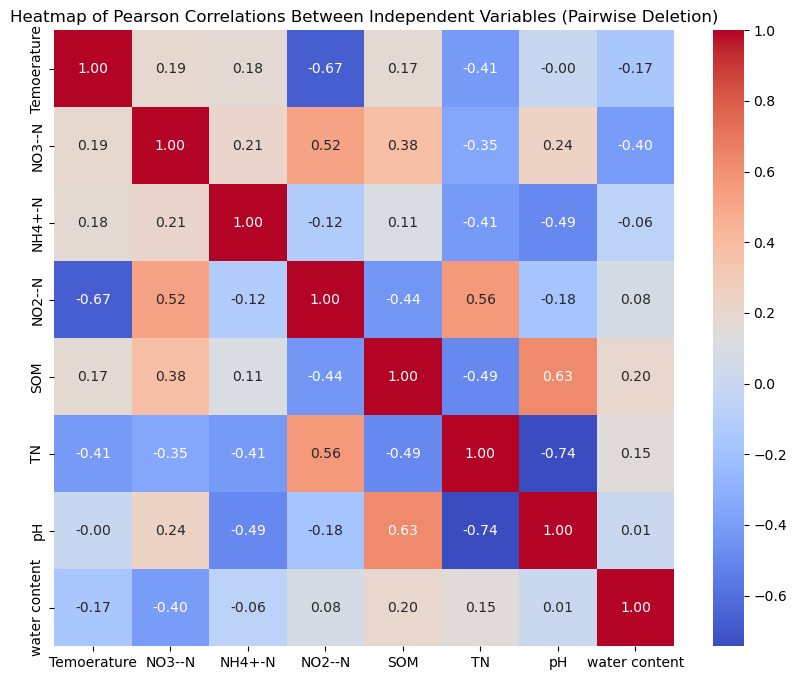

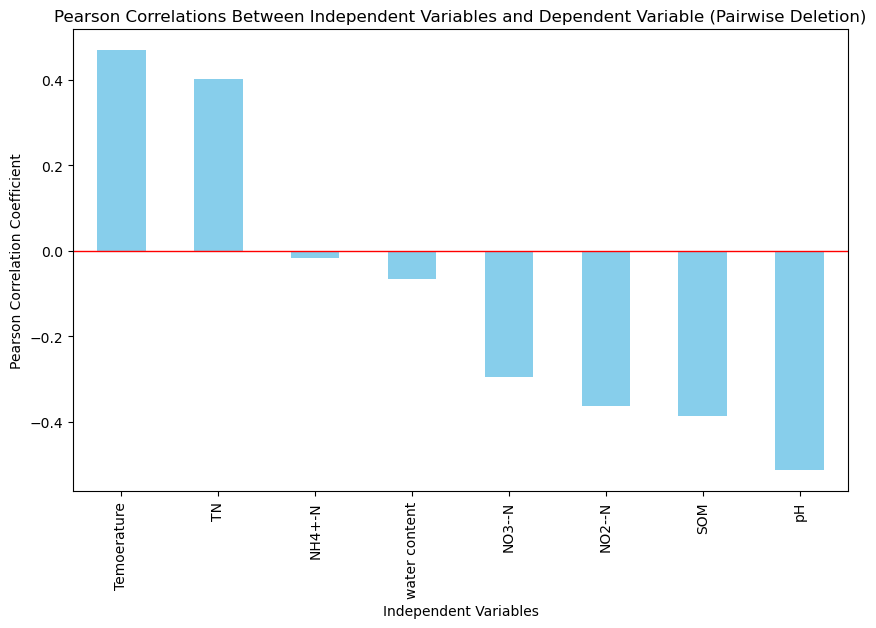

Model evaluation metrics:
R^2: 0.6861647464233457
MAE: 3.0264078159209773
MSE: 14.282736360337765
RMSE: 3.7792507670618742


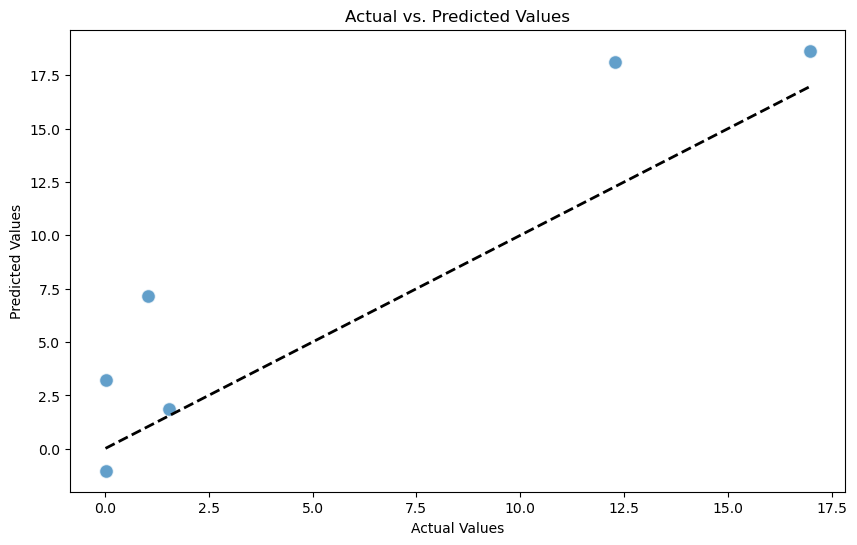

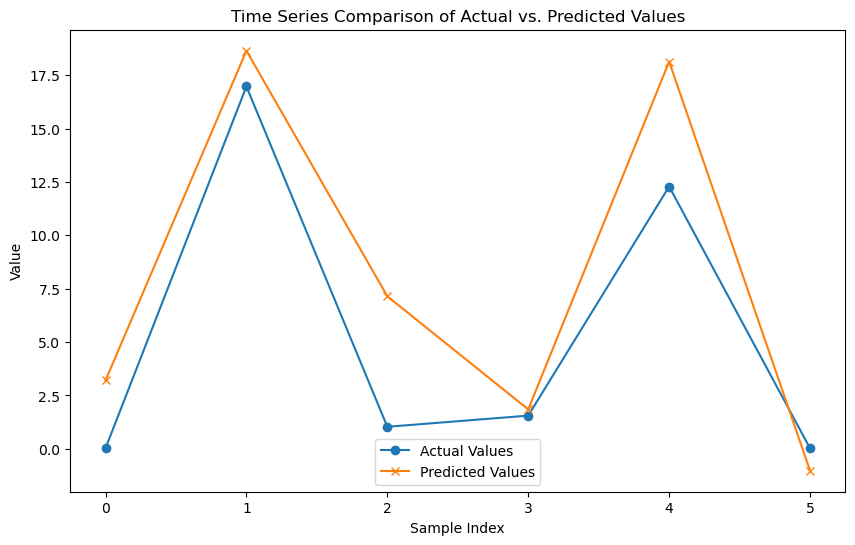

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load Excel data
data = pd.read_excel('C:/Users/86187/Desktop/反硝化速率 - 副本.xlsx')

# Check data types and missing values
print("Data types:")
print(data.dtypes)
print("\nMissing values count:")
print(data.isnull().sum())

# Separate independent variables (features) and dependent variable (target)
X = data.iloc[:, :-1]  # First eight columns
y = data.iloc[:, -1]   # Last column

# Calculate Pearson correlations using pairwise deletion
pearson_correlations = X.corrwith(y, method='pearson')
print("Pearson correlations between independent variables and dependent variable (Pairwise Deletion):")
print(pearson_correlations)

# Plot heatmap of correlations between independent variables
corr_matrix = X.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Pearson Correlations Between Independent Variables (Pairwise Deletion)')
plt.show()

# Plot Pearson correlations between independent variables and dependent variable
pearson_correlations = pearson_correlations.sort_values(ascending=False)  # Sort by correlation strength
plt.figure(figsize=(10, 6))
pearson_correlations.plot(kind='bar', color='skyblue')
plt.axhline(0, color='red', linewidth=1)  # Add zero reference line
plt.title('Pearson Correlations Between Independent Variables and Dependent Variable (Pairwise Deletion)')
plt.xlabel('Independent Variables')
plt.ylabel('Pearson Correlation Coefficient')
plt.show()

# Pairwise deletion: Remove missing values only in the involved variable pairs
def pairwise_deletion(X, y):
    mask = X.notnull().all(axis=1) & y.notnull()
    return X[mask], y[mask]

X_pairwise, y_pairwise = pairwise_deletion(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pairwise, y_pairwise, test_size=0.2, random_state=42)

# Train a BP Neural Network (MLPRegressor) model
model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000000, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Model evaluation metrics:")
print(f"R^2: {r2}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

# Plot scatter chart of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='w', s=100)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

# Plot time series comparison of actual vs. predicted values (assuming data has a time order)
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values', marker='o')
plt.plot(y_pred, label='Predicted Values', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Time Series Comparison of Actual vs. Predicted Values')
plt.legend()
plt.show()